In [26]:
import fasttext.util
from sklearn import decomposition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial

In [25]:
db_file = './journal-database/database100_preprocessed.xlsx'
ft = fasttext.load_model('cc.en.300.bin')

In [26]:
fasttext.util.reduce_model(ft, 100)

In [3]:
topics = {
  "mk": "musculoskeletal radiology",
  "ct": "computed tomography",
  "br": "breast imaging",
  "gu": "geritourinary radiology",
  "us": "ultrasound",
  "ch": "chest Radiology",
  "ir": "interventional radiology",
}

In [4]:
datamk = np.array(pd.read_excel(db_file, sheet_name='mk').abstract)
datact = np.array(pd.read_excel(db_file, sheet_name='ct').abstract)
databr = np.array(pd.read_excel(db_file, sheet_name='br').abstract)
datagu = np.array(pd.read_excel(db_file, sheet_name='gu').abstract)
dataus = np.array(pd.read_excel(db_file, sheet_name='us').abstract)
datach = np.array(pd.read_excel(db_file, sheet_name='ch').abstract)
datair = np.array(pd.read_excel(db_file, sheet_name='ir').abstract)

In [5]:
pca = decomposition.PCA(n_components=2, random_state=0)



In [30]:
def spatial_distance(vector1, vector2):
    return spatial.distance.euclidean(vector1, vector2)

In [6]:
# generate embedded vectors for all abstracts
def get_embedded_vectors(items):
    array = []
    for item in items:
        item_embedding = ft.get_sentence_vector(item)
        array.append(item_embedding)
    return array

In [7]:
# embedded vectors for abstracts

vectors_mk = get_embedded_vectors(datamk)
vectors_ct = get_embedded_vectors(datact)
vectors_br = get_embedded_vectors(databr)
vectors_gu = get_embedded_vectors(datagu)
vectors_us = get_embedded_vectors(dataus)
vectors_ch = get_embedded_vectors(datach)
vectors_ir = get_embedded_vectors(datair)


In [8]:
# embedded vectors for topics
arr = []
arr.append(ft.get_sentence_vector(topics['mk']))
arr.append(ft.get_sentence_vector(topics['ct']))
arr.append(ft.get_sentence_vector(topics['br']))
arr.append(ft.get_sentence_vector(topics['gu']))
arr.append(ft.get_sentence_vector(topics['us']))
arr.append(ft.get_sentence_vector(topics['ch']))
arr.append(ft.get_sentence_vector(topics['ir']))
two_dim = pca.fit_transform(arr)

In [9]:
# to two dimensions

two_dim_vectors_mk = pca.fit_transform(vectors_mk)
two_dim_vectors_ct = pca.fit_transform(vectors_ct)
two_dim_vectors_br = pca.fit_transform(vectors_br)
two_dim_vectors_gu = pca.fit_transform(vectors_gu)
two_dim_vectors_us = pca.fit_transform(vectors_us)
two_dim_vectors_ch = pca.fit_transform(vectors_ch)
two_dim_vectors_ir = pca.fit_transform(vectors_ir)

In [39]:
print(spatial_distance(arr[0], vectors_mk[0]))
print(spatial_distance(two_dim[], two_dim_vectors_mk[0]))

0.7325323224067688


IndexError: index 7 is out of bounds for axis 0 with size 7

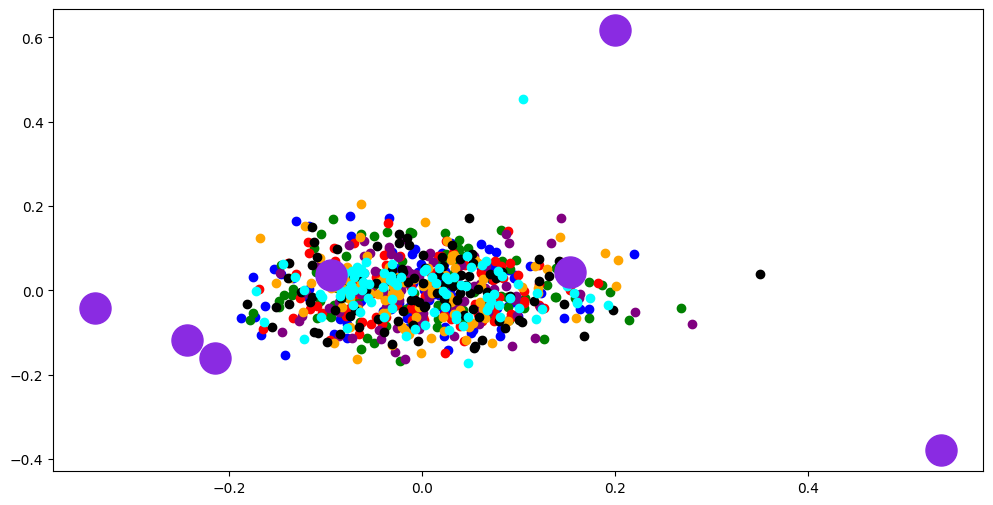

In [10]:
# visualize abstract-topic
plt.figure(figsize=(12, 6))
plt.scatter(two_dim_vectors_mk[:, 0], two_dim_vectors_mk[:, 1], c='blue')
plt.scatter(two_dim_vectors_ct[:, 0], two_dim_vectors_ct[:, 1], c='green')
plt.scatter(two_dim_vectors_br[:, 0], two_dim_vectors_br[:, 1], c='red')
plt.scatter(two_dim_vectors_gu[:, 0], two_dim_vectors_gu[:, 1], c='purple')
plt.scatter(two_dim_vectors_us[:, 0], two_dim_vectors_us[:, 1], c='orange')
plt.scatter(two_dim_vectors_ch[:, 0], two_dim_vectors_ch[:, 1], c='black')
plt.scatter(two_dim_vectors_ir[:, 0], two_dim_vectors_ir[:, 1], c='cyan')
plt.scatter(two_dim[:, 0], two_dim[:, 1], c='blueviolet', s=500)

In [40]:
# euclidean distance from one abstract to all topics, figure out what it would be categorized

def predict_correct_class(a_pca_vectors, topic_pca_vectors, correct_class):
    abstracts = []
    for i, vector in enumerate(a_pca_vectors):
        distances = []
        for topic in topic_pca_vectors:
            # euclidean distance between abstract and points
            distances.append(spatial_distance(vector,topic))
        abstracts.append(distances)
    right_wrong = [0,0]
    for distance in abstracts:
        if np.argmin(distance) == correct_class:
            right_wrong[0] += 1
        else: right_wrong[1] += 1
    return right_wrong

In [41]:
# predicted right classes for abstracts
mk_right_wrong = predict_correct_class(two_dim_vectors_mk, two_dim, 0)
ct_right_wrong = predict_correct_class(two_dim_vectors_ct, two_dim, 1)
br_right_wrong = predict_correct_class(two_dim_vectors_br, two_dim, 2)
gu_right_wrong = predict_correct_class(two_dim_vectors_gu, two_dim, 3)
us_right_wrong = predict_correct_class(two_dim_vectors_us, two_dim, 4)
ch_right_wrong = predict_correct_class(two_dim_vectors_ch, two_dim, 5)
ir_right_wrong = predict_correct_class(two_dim_vectors_ir, two_dim, 6)

In [42]:
print(mk_right_wrong)
print(ct_right_wrong)
print(br_right_wrong)
print(gu_right_wrong)
print(us_right_wrong)
print(ch_right_wrong)
print(ir_right_wrong)
#br ja ch dominoi 
# ACCURACY, laskettu printeistä laskimella = 0.140350877

[2, 98]
[0, 96]
[36, 62]
[0, 99]
[0, 96]
[57, 42]
[1, 95]


In [14]:
titlemk = np.array(pd.read_excel(db_file, sheet_name='mk').title)
titlect = np.array(pd.read_excel(db_file, sheet_name='ct').title)
titlebr = np.array(pd.read_excel(db_file, sheet_name='br').title)
titlegu = np.array(pd.read_excel(db_file, sheet_name='gu').title)
titleus = np.array(pd.read_excel(db_file, sheet_name='us').title)
titlech = np.array(pd.read_excel(db_file, sheet_name='ch').title)
titleir = np.array(pd.read_excel(db_file, sheet_name='ir').title)

In [15]:
# embedded vectors for title

title_vectors_mk = get_embedded_vectors(titlemk)
title_vectors_ct = get_embedded_vectors(titlect)
title_vectors_br = get_embedded_vectors(titlebr)
title_vectors_gu = get_embedded_vectors(titlegu)
title_vectors_us = get_embedded_vectors(titleus)
title_vectors_ch = get_embedded_vectors(titlech)
title_vectors_ir = get_embedded_vectors(titleir)

# to two dimensions

two_dim_title_mk = pca.fit_transform(title_vectors_mk)
two_dim_title_ct = pca.fit_transform(title_vectors_ct)
two_dim_title_br = pca.fit_transform(title_vectors_br)
two_dim_title_gu = pca.fit_transform(title_vectors_gu)
two_dim_title_us = pca.fit_transform(title_vectors_us)
two_dim_title_ch = pca.fit_transform(title_vectors_ch)
two_dim_title_ir = pca.fit_transform(title_vectors_ir)

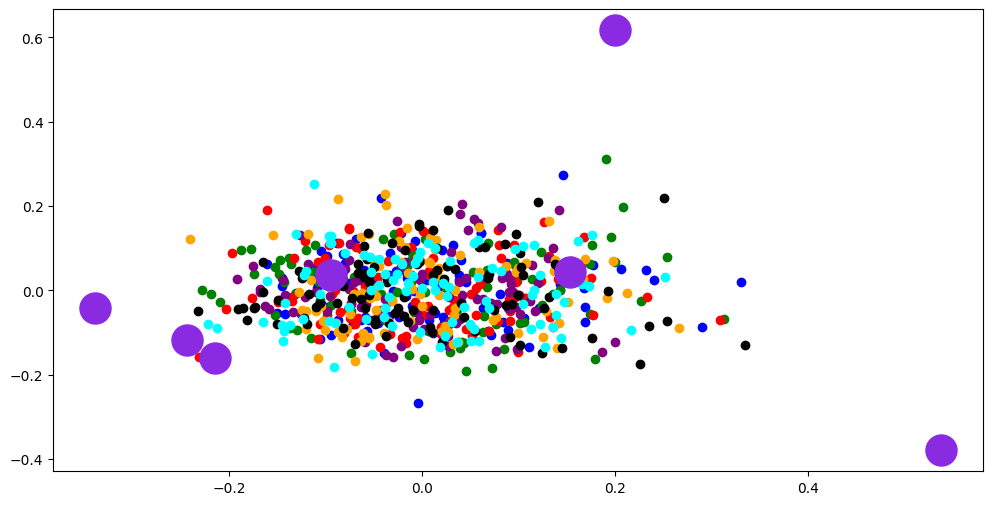

In [16]:
# visualize titles-topic
plt.figure(figsize=(12, 6))
plt.scatter(two_dim_title_mk[:, 0], two_dim_title_mk[:, 1], c='blue')
plt.scatter(two_dim_title_ct[:, 0], two_dim_title_ct[:, 1], c='green')
plt.scatter(two_dim_title_br[:, 0], two_dim_title_br[:, 1], c='red')
plt.scatter(two_dim_title_gu[:, 0], two_dim_title_gu[:, 1], c='purple')
plt.scatter(two_dim_title_us[:, 0], two_dim_title_us[:, 1], c='orange')
plt.scatter(two_dim_title_ch[:, 0], two_dim_title_ch[:, 1], c='black')
plt.scatter(two_dim_title_ir[:, 0], two_dim_title_ir[:, 1], c='cyan')
plt.scatter(two_dim[:, 0], two_dim[:, 1], c='blueviolet', s=500)

In [43]:
# predicted right classes for titles
mk_title_right_wrong = predict_correct_class(two_dim_title_mk, two_dim, 0)
ct_title_right_wrong = predict_correct_class(two_dim_title_ct, two_dim, 1)
br_title_right_wrong = predict_correct_class(two_dim_title_br, two_dim, 2)
gu_title_right_wrong = predict_correct_class(two_dim_title_gu, two_dim, 3)
us_title_right_wrong = predict_correct_class(two_dim_title_us, two_dim, 4)
ch_title_right_wrong = predict_correct_class(two_dim_title_ch, two_dim, 5)
ir_title_right_wrong = predict_correct_class(two_dim_title_ir, two_dim, 6)

print(mk_title_right_wrong)
print(ct_title_right_wrong)
print(br_title_right_wrong)
print(gu_title_right_wrong)
print(us_title_right_wrong)
print(ch_title_right_wrong)
print(ir_title_right_wrong)
#br ja ch dominoi 
# ACCURACY, laskettu printeistä laskimella = 0,141812865

[0, 100]
[0, 96]
[36, 62]
[0, 99]
[0, 96]
[56, 43]
[5, 91]


In [18]:
def add_title_and_abstract(abstracts, titles):
    arr = []
    i = 0
    while i < len(abstracts):
        arr.append(titles[i] + " " + abstracts[i])
        i += 1
    return arr

In [19]:
# add title and abstract to one string
title_abstract_mk = add_title_and_abstract(datamk, titlemk)
title_abstract_ct = add_title_and_abstract(datact, titlect)
title_abstract_br = add_title_and_abstract(databr, titlebr)
title_abstract_gu = add_title_and_abstract(datagu, titlegu)
title_abstract_us = add_title_and_abstract(dataus, titleus)
title_abstract_ch = add_title_and_abstract(datach, titlech)
title_abstract_ir = add_title_and_abstract(datair, titleir)

In [20]:
# embedded vectors for abstracts

ta_vectors_mk = get_embedded_vectors(title_abstract_mk)
ta_vectors_ct = get_embedded_vectors(title_abstract_ct)
ta_vectors_br = get_embedded_vectors(title_abstract_br)
ta_vectors_gu = get_embedded_vectors(title_abstract_gu)
ta_vectors_us = get_embedded_vectors(title_abstract_us)
ta_vectors_ch = get_embedded_vectors(title_abstract_ch)
ta_vectors_ir = get_embedded_vectors(title_abstract_ir)

In [21]:
# PCA for title-abstract
two_dim_ta_mk = pca.fit_transform(ta_vectors_mk)
two_dim_ta_ct = pca.fit_transform(ta_vectors_ct)
two_dim_ta_br = pca.fit_transform(ta_vectors_br)
two_dim_ta_gu = pca.fit_transform(ta_vectors_gu)
two_dim_ta_us = pca.fit_transform(ta_vectors_us)
two_dim_ta_ch = pca.fit_transform(ta_vectors_ch)
two_dim_ta_ir = pca.fit_transform(ta_vectors_ir)

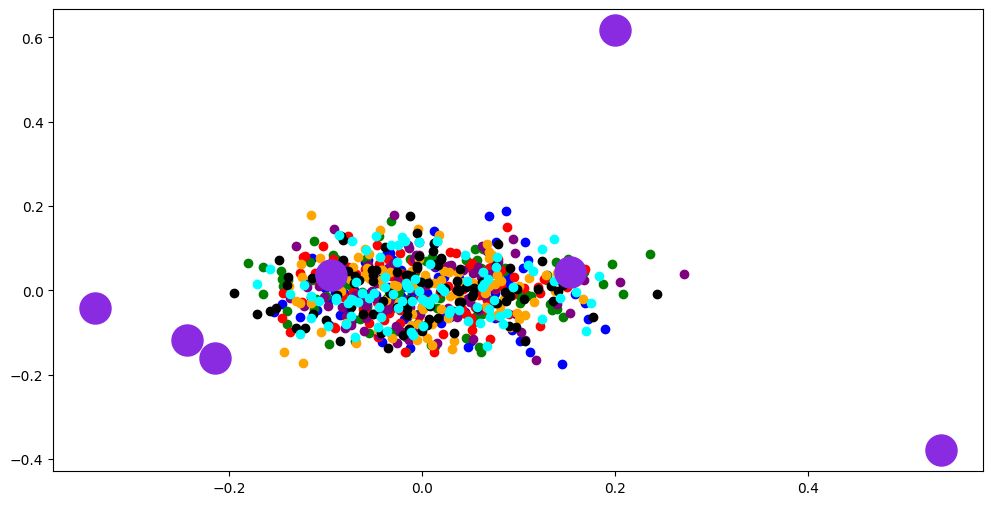

In [22]:
# visualize abstract-titles-topic
plt.figure(figsize=(12, 6))
plt.scatter(two_dim_ta_mk[:, 0], two_dim_ta_mk[:, 1], c='blue')
plt.scatter(two_dim_ta_ct[:, 0], two_dim_ta_ct[:, 1], c='green')
plt.scatter(two_dim_ta_br[:, 0], two_dim_ta_br[:, 1], c='red')
plt.scatter(two_dim_ta_gu[:, 0], two_dim_ta_gu[:, 1], c='purple')
plt.scatter(two_dim_ta_us[:, 0], two_dim_ta_us[:, 1], c='orange')
plt.scatter(two_dim_ta_ch[:, 0], two_dim_ta_ch[:, 1], c='black')
plt.scatter(two_dim_ta_ir[:, 0], two_dim_ta_ir[:, 1], c='cyan')
plt.scatter(two_dim[:, 0], two_dim[:, 1], c='blueviolet', s=500)

In [44]:
# predicted right classes for abstract-titles
mk_ta_right_wrong = predict_correct_class(two_dim_ta_mk, two_dim, 0)
ct_ta_right_wrong = predict_correct_class(two_dim_ta_ct, two_dim, 1)
br_ta_right_wrong = predict_correct_class(two_dim_ta_br, two_dim, 2)
gu_ta_right_wrong = predict_correct_class(two_dim_ta_gu, two_dim, 3)
us_ta_right_wrong = predict_correct_class(two_dim_ta_us, two_dim, 4)
ch_ta_right_wrong = predict_correct_class(two_dim_ta_ch, two_dim, 5)
ir_ta_right_wrong = predict_correct_class(two_dim_ta_ir, two_dim, 6)

print(mk_ta_right_wrong)
print(ct_ta_right_wrong)
print(br_ta_right_wrong)
print(gu_ta_right_wrong)
print(us_ta_right_wrong)
print(ch_ta_right_wrong)
print(ir_ta_right_wrong)
#br ja ch dominoi täysillä
# ACCURACY, laskettu printeistä laskimella = 0,147660819

[0, 100]
[0, 96]
[40, 58]
[0, 99]
[0, 96]
[60, 39]
[1, 95]
